<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04 Optical Flow**

> **204383 Image Processing** 

---

> **Tocktack | Kasidis Torcharoen (610510531)** \\
**Top | Kittisak Thammawong (610510611)**

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt

In [60]:
def DenseOF(path):
    '''   Dense Optical Flow using the Farneback method   '''

    # method primimg
    cap = cv.VideoCapture(path)
    ret, first_frame = cap.read()
    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)

    # Creates an image filled with zero intensities with the same dimensions as the frame
    # Sets image saturation to maximum
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255

    # list of return
    img1_lst = []
    img2_lst = []

    while(cap.isOpened()):

        # try to read frames
        ret, frame = cap.read()
        if not ret: break
        img1_lst.append(frame)
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        # Farneback method
        flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        # Computes the magnitude(r) and angle(theta) of the 2D vectors
        magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
        
        # Sets image hue according to the optical flow direction
        mask[..., 0] = angle * 180 / np.pi / 2
        
        # Sets image value according to the optical flow magnitude (normalized)
        mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
        
        # Converts HSV to RGB (BGR) color representation
        rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
        
        # Opens a new window and displays the output frame
        img2_lst.append(rgb)
        
        # Updates previous frame
        prev_gray = gray

    # The following frees up resources and closes all windows
    cap.release()

    return img1_lst, img2_lst

In [61]:
img1s, img2s = DenseOF("shibuya.mp4")

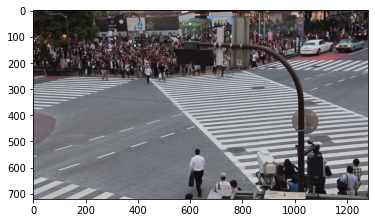

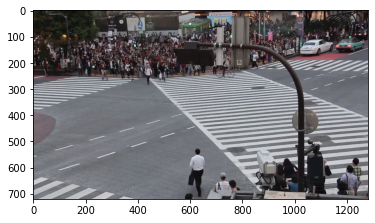

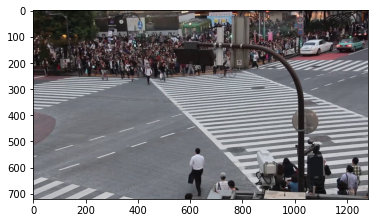

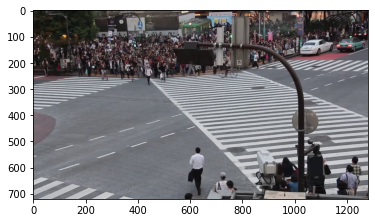

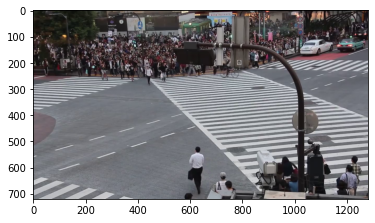

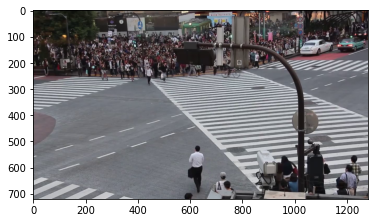

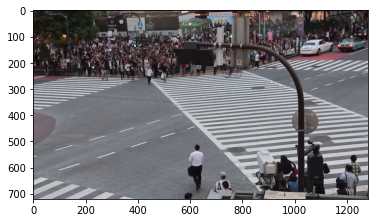

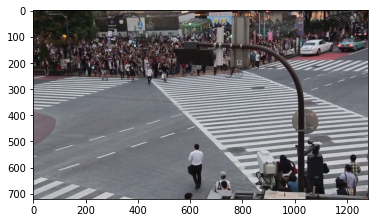

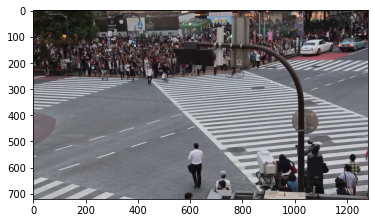

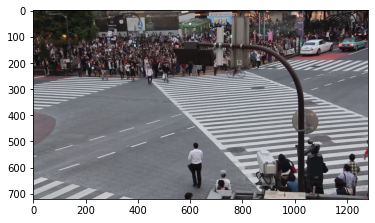

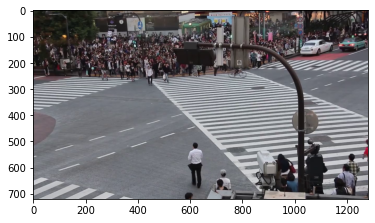

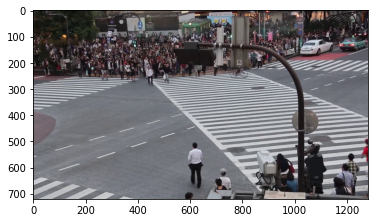

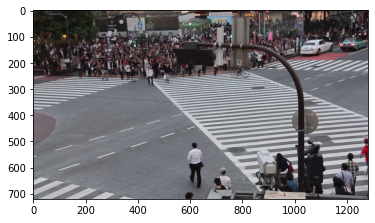

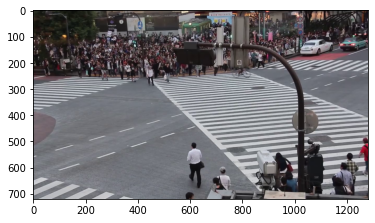

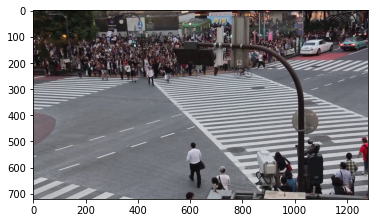

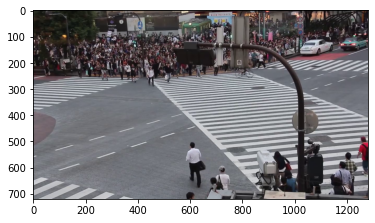

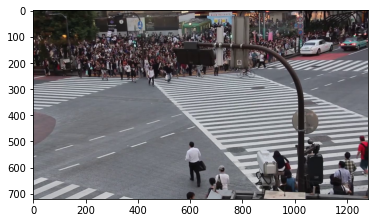

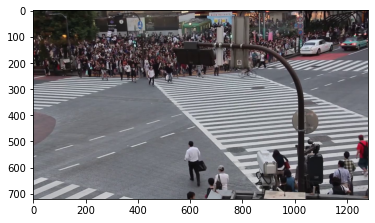

In [64]:
for imx in img1s:
    im = cv.cvtColor(imx, cv.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.show()

In [93]:
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML, Image

ani = animation.ArtistAnimation(plt.gcf(), img2s, interval=50, blit=True, repeat=False)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1525, in _init_draw
    artist.set_visible(False)
AttributeError: 'numpy.ndarray' object has no attribute 'set_visible'


<Figure size 432x288 with 0 Axes>

In [69]:
ani = animation.ArtistAnimation(fig, img_array, interval=50, blit=True,repeat_delay=10

18

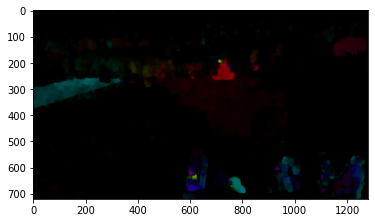

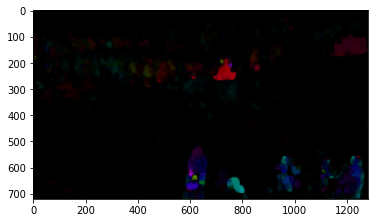

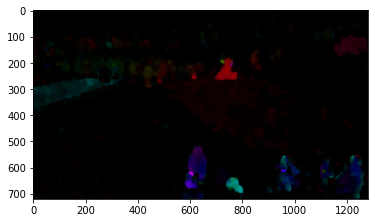

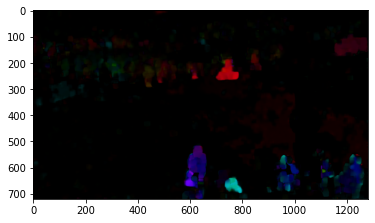

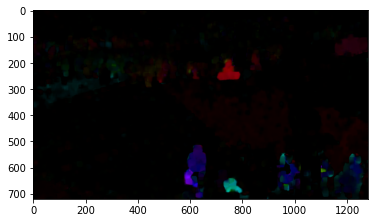

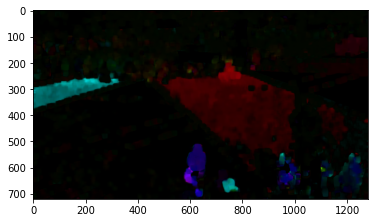

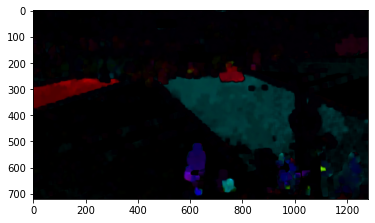

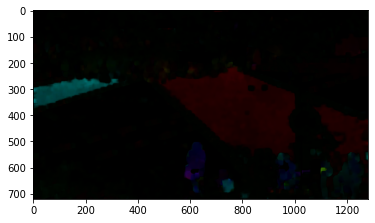

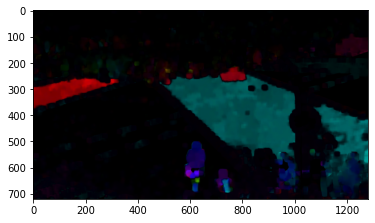

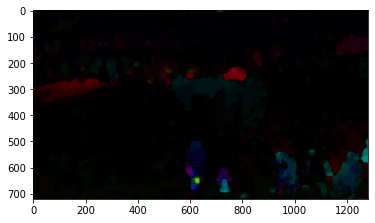

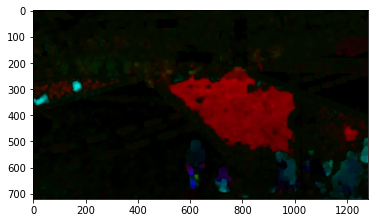

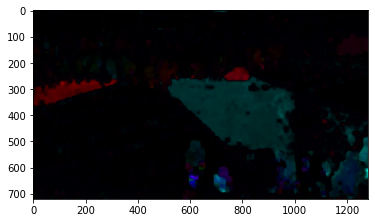

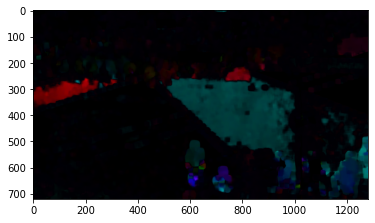

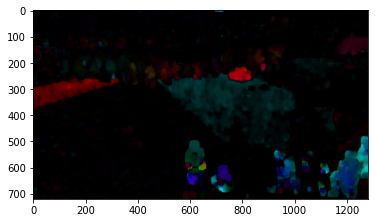

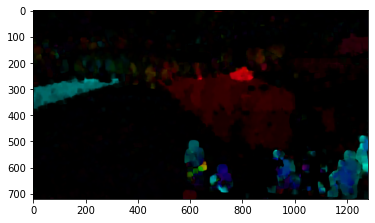

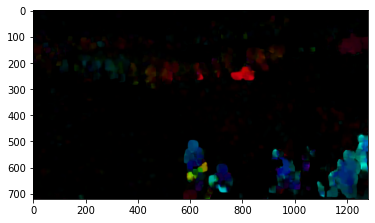

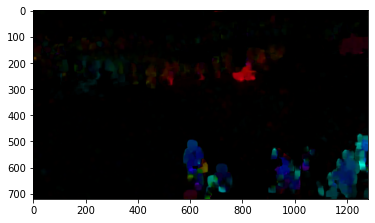

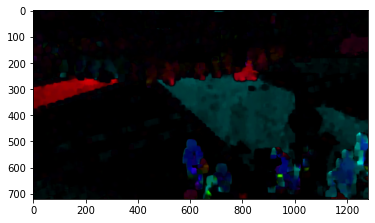

In [65]:
for imx in img2s:
    im = cv.cvtColor(imx, cv.COLOR_BGR2RGB)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)